In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
logfile = 'fe3_20200917-134157.log'
df = pd.read_fwf(logfile,
                 colspecs=[(0, 10), (12, 24), (25,200)],
                 comment = '<soap',
                 names=['date', 'time', 'message'],
                 infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]},
                 index_col = 'datetime')
df.head()

,message
datetime,
2020-09-17 07:41:57.789,DEBUG: Starting new HTTP connection (1): 10.1....
2020-09-17 07:41:57.816,"DEBUG: http://10.1.1.101:9110 ""POST / HTTP/1.1..."
2020-09-17 07:41:57.818,INFO: GC license key: 2J222-3WF4S-V8QHB-UYAKR
2020-09-17 07:41:57.831,"DEBUG: http://10.1.1.101:9110 ""POST / HTTP/1.1..."
2020-09-17 07:41:57.832,INFO: Starting data collection on detector 1


<h3>Search for strings in the message field

In [12]:
inj = df.loc[df.message.str.find('Injection number') >= 0]
inj.head()

,message
datetime,
2020-09-17 07:58:50.561,INFO: Injection number 1
2020-09-17 08:03:50.558,INFO: Injection number 2
2020-09-17 08:08:50.568,INFO: Injection number 3
2020-09-17 08:13:50.568,INFO: Injection number 4
2020-09-17 08:18:50.568,INFO: Injection number 5


In [13]:
inj['injnum'] = np.arange(inj.shape[0])+1
inj.head()

/Users/geoff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,message,injnum
datetime,,
2020-09-17 07:58:50.561,INFO: Injection number 1,1
2020-09-17 08:03:50.558,INFO: Injection number 2,2
2020-09-17 08:08:50.568,INFO: Injection number 3,3
2020-09-17 08:13:50.568,INFO: Injection number 4,4
2020-09-17 08:18:50.568,INFO: Injection number 5,5


In [33]:
inj = inj.reset_index()
inj['delta'] = inj.datetime.diff()
inj = inj.set_index('datetime')

In [34]:
inj = inj.dropna()

Text(0, 0.5, 'time diff from previous injection')

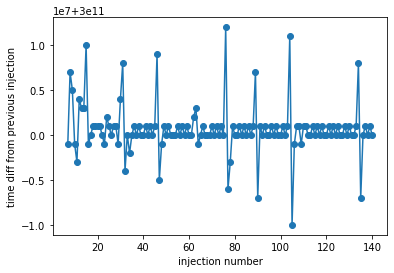

In [35]:
plt.plot(inj.injnum, inj.delta, 'o-')
plt.xlabel('injection number')
plt.ylabel('time diff from previous injection')

In [36]:
inj.delta.describe()

count                          134
mean     0 days 00:05:00.000664179
std      0 days 00:00:00.002820291
min         0 days 00:04:59.990000
25%                0 days 00:05:00
50%                0 days 00:05:00
75%         0 days 00:05:00.001000
max         0 days 00:05:00.012000
Name: delta, dtype: object